In [1]:
## MP 573 Lecture 2x: Pseudo-random Number Generator
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal
import pywt as wt
from skimage.data import shepp_logan_phantom

font = {'weight' : 'normal',
        'size'   : 18}

np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)

## Kneading as a random number generator

In [2]:
# Start with some initial position between 0 and 1
p0 = 0.4;
p = p0;
k = 0;

In [3]:
# Kneading process (fold, then press)
fold_location = 0.45 + (k%20)/200; # Where to fold the dough
if p < fold_location:
    p = fold_location + (fold_location - p) # Fold "forward"
    
# Now press the dough so it is located between 0 and 1
p = (p-fold_location)/(np.maximum(fold_location,1.0-fold_location))


# Increase k
k = k+1

p


0.09090909090909088

In [4]:
# Kneading process (fold, then press, N times)
# Start with some initial position between 0 and 1
p0 = np.linspace(0.2, 0.21, num=1000);
p = np.copy(p0);
k=0

Original locations: [0.2     0.20001 0.20002 0.20003]
Current locations:  [0.45455 0.45453 0.45451 0.45449]


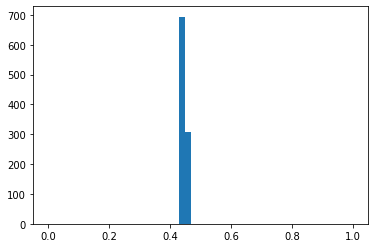

In [5]:
fold_location = 0.45 + (k%20)/200; # Where to fold the dough

p[p < fold_location] = fold_location + (fold_location - p[p < fold_location]) # Fold "forward"
    
# Now press the dough so it is located between 0 and 1
p = (p-fold_location)/(np.maximum(fold_location,1.0-fold_location))

# Display
plt.hist(p, bins=np.linspace(0,1,50));
print('Original locations: ' + str(p0[0:4]))
print('Current locations:  ' + str(p[0:4]))

# Increase k
k = k+1

Original locations: [0.2    0.2001 0.2002 0.2003]
Current locations:  [0.49889 0.63994 0.69627 0.57983]


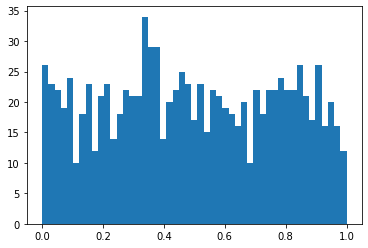

In [6]:
# Kneading process (fold, then press, N times)
# Start with some initial position between 0 and 1
p0 = np.linspace(0.2, 0.3, num=1000);
p = np.copy(p0);
N = 500000
for k in range(N): # Put it in a loop
    fold_location = 0.50 + (k%20)/10000; # Where to fold the dough

    p[p < fold_location] = fold_location + (fold_location - p[p < fold_location]) # Fold "forward"
    
    # Now press the dough so it is located between 0 and 1
    p = (p-fold_location)/(np.maximum(fold_location,1.0-fold_location))
plt.hist(p, bins=np.linspace(0,1,50));
print('Original locations: ' + str(p0[0:4]))
print('Current locations:  ' + str(p[0:4]))

Original locations: [0.25    0.25005 0.2501  0.25015]
Current locations:  [0.3842  0.17707 0.08309 0.20618]


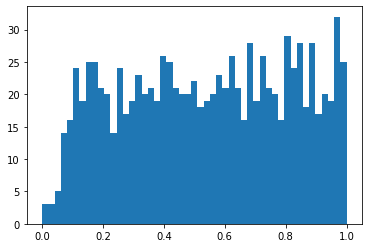

In [7]:
# Kneading process (stretch, then fold, N times)
# Start with some initial position between 0 and 1
p0 = np.linspace(0.25,0.3, num=1000);
p = np.copy(p0);
N = 100

for k in range(N): # Put it in a loop
    # Now press the dough so it is located between 0 and 1
    p = 2*p
    fold_location = 1.0 + (k%10 - 5)/50/np.pi; # Where to fold the dough
    #print(fold_location)
    p[p > fold_location] =  2*fold_location - p[p > fold_location] # Fold back
    if np.min(p) < 0:
        p = p-np.min(p)
    if np.max(p) > 1:
        p = p/np.max(p)
    
    
plt.hist(p, bins=np.linspace(0,1,50));
print('Original locations: ' + str(p0[0:4]))
print('Current locations:  ' + str(p[0:4]))

Original locations: [0.25    0.25005 0.2501  0.25015]
Current locations:  [0.10047 0.51907 0.36688 0.78548]


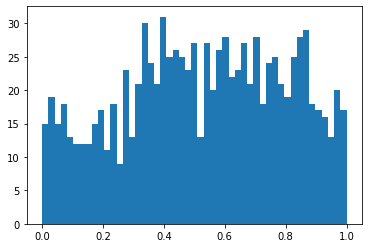

In [8]:
# Kneading process (stretch, then modulo, N times)
# Start with some initial position between 0 and 1
p0 = np.linspace(0.25,0.3, num=1000);
p = np.copy(p0);
N = 20

a = np.pi/2;# Stretch factor
b = np.pi/10# Shift factor

for k in range(N): # Put it in a loop
    # Stretch and shift the dough
    p = a*p + b
    # Now press the dough so it is located between 0 and 1
    p = p%1
    
    
plt.hist(p, bins=np.linspace(0,1,50));
print('Original locations: ' + str(p0[0:4]))
print('Current locations:  ' + str(p[0:4]))